# Import all the Dependencies

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# initializing the CNN

CNN_Classifier=Sequential()

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# flattening

CNN_Classifier.add(Flatten())

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))
 
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary

In [20]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

# Building and Compiling the Model

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\RiceLeafsv3\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\RiceLeafsv3\validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=50,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Found 2167 images belonging to 6 classes.
Found 543 images belonging to 6 classes.
Epoch 1/50
68/68 [==============================] - 196s 3s/step - loss: 0.1657 - accuracy: 0.9363 - val_loss: 0.2552 - val_accuracy: 0.9006
Epoch 2/50
68/68 [==============================] - 195s 3s/step - loss: 0.1484 - accuracy: 0.9419 - val_loss: 0.2743 - val_accuracy: 0.9024
Epoch 3/50
68/68 [==============================] - 197s 3s/step - loss: 0.1639 - accuracy: 0.9377 - val_loss: 0.2814 - val_accuracy: 0.8987
Epoch 4/50
68/68 [==============================] - 227s 3s/step - loss: 0.1463 - accuracy: 0.9442 - val_loss: 0.2743 - val_accuracy: 0.9024
Epoch 5/50
68/68 [==============================] - 246s 4s/step - loss: 0.1732 - accuracy: 0.9432 - val_loss: 0.2460 - val_accuracy: 0.9208
Epoch 6/50
68/68 [==============================] - 229s 3s/step - loss: 0.1583 - accuracy: 0.9368 - val_loss: 0.2866 - val_accuracy: 0.9006
Epoch 7/50
68/68 [==============================] - 219s 3s/step - loss

In [12]:
scores = CNN_Classifier.evaluate(training_set)

68/68 [==============================] - 111s 2s/step - loss: 0.1264 - accuracy: 0.9474


# Saving the Model

In [9]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\rice_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\rice_model.h5')

# Plotting

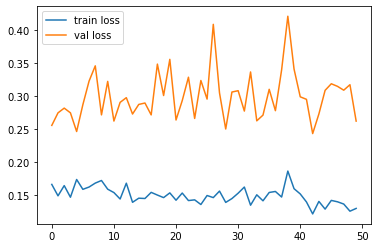

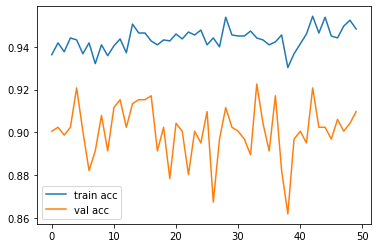

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Defining Classes

In [14]:
training_set.class_indices

{'bacterial_leaf_blight': 0,
 'brown_spot': 1,
 'healthy': 2,
 'leaf_blast': 3,
 'leaf_scald': 4,
 'narrow_brown_spot': 5}

In [15]:
class_names = list(training_set.class_indices.keys())
class_names

['bacterial_leaf_blight',
 'brown_spot',
 'healthy',
 'leaf_blast',
 'leaf_scald',
 'narrow_brown_spot']

In [16]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.9058824  0.882353   0.882353  ]
  [0.9058824  0.882353   0.882353  ]
  [0.9222205  0.8986911  0.8986911 ]
  ...
  [0.97297543 0.9612107  0.93375975]
  [0.97647065 0.96470594 0.93725497]
  [0.97647065 0.96470594 0.93725497]]

 [[0.9058824  0.882353   0.882353  ]
  [0.9058824  0.882353   0.882353  ]
  [0.9221553  0.8986259  0.8986259 ]
  ...
  [0.97295684 0.96119213 0.93374115]
  [0.97647065 0.96470594 0.93725497]
  [0.97647065 0.96470594 0.93725497]]

 [[0.9058824  0.882353   0.882353  ]
  [0.9058824  0.882353   0.882353  ]
  [0.9220902  0.89856076 0.89856076]
  ...
  [0.9729382  0.9611735  0.9337225 ]
  [0.97647065 0.96470594 0.93725497]
  [0.97647065 0.96470594 0.93725497]]

 ...

 [[0.7254902  0.7019608  0.7019608 ]
  [0.7254902  0.7019608  0.7019608 ]
  [0.7219578  0.7090257  0.7054933 ]
  ...
  [0.83510643 0.8233417  0.79589075]
  [0.8235295  0.8117648  0.7843138 ]
  [0.8235295  0.8117648  0.7843138 ]]

 [[0.7254902  0.7019608  0.7019608 ]
  [0.7254902  0.7019608  0.7019608 ]


# Run prediction on a sample image

first image to predict
actual label: leaf_blast
1/1 [==============================] - 7s 7s/step
predicted label: leaf_blast


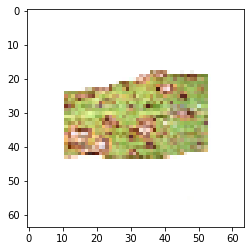

In [17]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break